In [243]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random

In [244]:
def extract_text(filename):
    with open(filename, 'r') as f:
            lines = f.readlines()
            text = [line.rstrip('\n') for line in lines]
            return text
    return text

def build_symbol_pairs(symbols):
    symbol_pairs = set()
    for i in symbols:
        for j in symbols:
            symbol_pairs.add((i, j))
    return symbol_pairs

def clean_text(raw_text_path):
    raw_text = []
    with open(raw_text_path, 'r', encoding='utf-8') as fh:
        raw_text = fh.read()
    lower_text = raw_text.lower()
    cleaned_text = lower_text.replace('\n', ' ')
    return cleaned_text

def normalise_matrix(matrix):
    normalised_matrix = matrix / matrix.sum(axis=0, keepdims=True) # Column normalisation
    return normalised_matrix

In [245]:
symbols = extract_text('symbols.txt')
symbol_pairs = build_symbol_pairs(symbols)
cleaned_corpus = clean_text("War_and_Peace.txt")

In [246]:
char_count = dict(Counter(cleaned_corpus))
symbol_count = {
    x: char_count[x]
    for x in char_count
    if x in symbols
}

In [247]:
stationary_dict = {}
for x in symbols:
   stationary_dict.update({x: symbol_count[x]/sum(symbol_count.values())})

stationary_distribution = np.array(list(stationary_dict.values()))
stationary_dict

{'=': 6.271057033695958e-07,
 ' ': 0.18280068542653377,
 '-': 0.0005747423771382344,
 ',': 0.012507309700854901,
 ';': 0.0003587044623274088,
 ':': 0.00031574772164659145,
 '!': 0.0012310084957145163,
 '?': 0.0009829881900318414,
 '/': 2.821975665163181e-06,
 '.': 0.009681571401471504,
 "'": 2.194869961793585e-06,
 '"': 6.898162737065553e-06,
 '(': 0.00020913975207376018,
 ')': 0.00020913975207376018,
 '[': 6.271057033695958e-07,
 ']': 6.271057033695958e-07,
 '*': 9.030322128522179e-05,
 '0': 5.330398478641564e-05,
 '1': 0.00012228561215707115,
 '2': 4.5151610642610894e-05,
 '3': 1.8499618249403075e-05,
 '4': 7.211715588750351e-06,
 '5': 1.599119543592469e-05,
 '6': 1.6618301139294286e-05,
 '7': 1.1915008364022318e-05,
 '8': 6.020214752348119e-05,
 '9': 1.0033691253913532e-05,
 'a': 0.06356155277643212,
 'b': 0.01086617407513667,
 'c': 0.019323948696482407,
 'd': 0.037091107484349795,
 'e': 0.09833393692257282,
 'f': 0.01721248379323698,
 'g': 0.01609435432412899,
 'h': 0.0524962726404

In [248]:
char_pairs_count = dict(Counter(zip(cleaned_corpus[:-1], cleaned_corpus[1:])))
symbol_pairs_count = {
    x: char_pairs_count[x]
    for x in char_pairs_count
    if x in symbol_pairs}

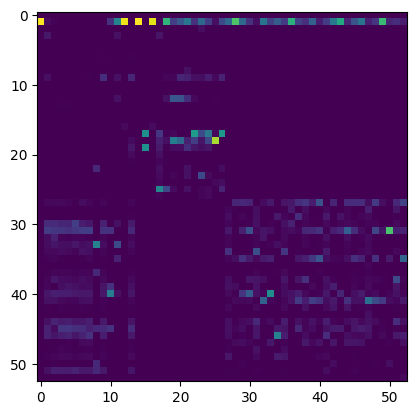

In [249]:
alpha = 1e-5
d = len(symbols)

raw_transition_matrix = np.zeros((d, d))

for i in range(d):
    for j in range(d):
        if (symbols[i], symbols[j]) in symbol_pairs_count:
            raw_transition_matrix[i][j] = symbol_pairs_count[(symbols[i], symbols[j])]
        else:
            pass

regularized_transition_matrix = ((1-alpha)*raw_transition_matrix) + (alpha/d)
normalised_transition_matrix = normalise_matrix(regularized_transition_matrix)

plt.imshow(normalised_transition_matrix)
plt.show()

{'=': np.float64(6.379351086243996e-07),
 ' ': np.float64(0.18287756367665003),
 '-': np.float64(0.000583538704342821),
 ',': np.float64(0.011866968801165664),
 ';': np.float64(0.00036489711190575223),
 ':': np.float64(0.00032119738876777975),
 '!': np.float64(0.0005772924674963958),
 '?': np.float64(0.00045066672631215664),
 '/': np.float64(2.8456389603115673e-06),
 '.': np.float64(0.008981071354235601),
 "'": np.float64(2.2546178091403094e-06),
 '"': np.float64(6.9677710713189556e-06),
 '(': np.float64(0.00020957507996208558),
 ')': np.float64(0.00020438775765931028),
 '[': np.float64(6.308988408486976e-07),
 ']': np.float64(6.379351086243996e-07),
 '*': np.float64(9.114702486324425e-05),
 '0': np.float64(5.1763349135845837e-05),
 '1': np.float64(0.00011952169358796826),
 '2': np.float64(4.360043905457025e-05),
 '3': np.float64(1.79793203270001e-05),
 '4': np.float64(7.0540504500085935e-06),
 '5': np.float64(1.526637759465696e-05),
 '6': np.float64(1.5700855809704274e-05),
 '7': np.f

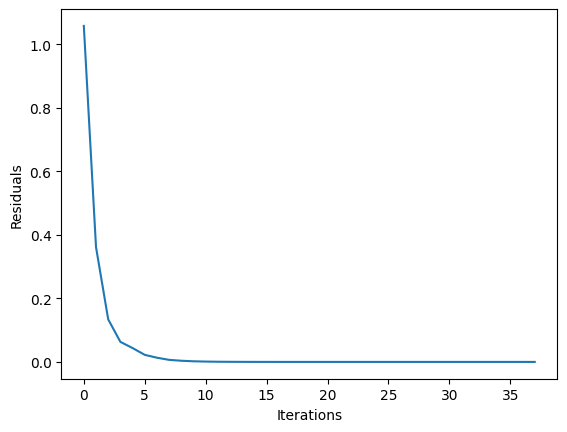

In [250]:
# Check whether we get the same stationary distribution from the transition matrix

stationary_distribution_theor = np.ones((d))/d
delta = np.inf
residuals = []
tol = 1e-10

while abs(delta) > tol:
    new_stationary_distribution_theor = normalised_transition_matrix @ stationary_distribution_theor
    delta = np.linalg.norm(new_stationary_distribution_theor - stationary_distribution_theor, ord = 1)
    residuals += [delta]
    stationary_distribution_theor = new_stationary_distribution_theor
stationary_distribution_theor = (stationary_distribution_theor / stationary_distribution_theor.sum()).squeeze()


plt.figure()
plt.plot(residuals)
plt.ylabel('Residuals')
plt.xlabel('Iterations')

stationary_theor_dict = dict(zip(symbols, stationary_distribution_theor))
stationary_theor_dict

In [251]:
message = clean_text('message.txt')

In [252]:
sym2idx = {s: i for i, s in enumerate(symbols)}
idx2sym = {i: s for i, s in enumerate(symbols)}
cipher_idx = np.array([sym2idx[c] for c in message])


In [253]:

def decrypt_string(idx2sym, decrypted_idx, show_chars):
    decrypted_idx = decrypted_idx[:show_chars]
    return ''.join(idx2sym[i] for i in decrypted_idx)

def compute_log_likelihood(decrypted_idx, stationary_distribution, normalised_transition_matrix):
    log_likelihood = np.log(stationary_distribution[decrypted_idx[0]])  # log_likelihood of first character
    input_char = decrypted_idx[:-1]
    output_char = decrypted_idx[1:]
    log_likelihood += np.sum(np.log(normalised_transition_matrix[input_char, output_char])) # log_likelihood of subsequent transitions
    return log_likelihood

def init_permutation_random(d):
    permutation = np.arange(d)
    np.random.shuffle(permutation)
    return permutation

def init_permutation_frequency(cipher_idx, stationary_distribution, d):

    cipher_counts = np.bincount(cipher_idx, minlength=d)  # count symbol appearances in cipher
    cipher_ranking = np.argsort(-cipher_counts) # sort by descending frequency in cipher
    decrypt_ranking = np.argsort(-stationary_distribution) # sort by descending frequency in decrypted corpus

    permutation = np.zeros(d, dtype=int)
    for cipher_symbol, plain_symbol in zip(cipher_ranking, decrypt_ranking):
        permutation[cipher_symbol] = plain_symbol
    return permutation

def propose_swap(current_permutation):
    proposed_permutation = current_permutation.copy()
    a, b = random.sample(range(len(current_permutation)), 2)
    proposed_permutation[a], proposed_permutation[b] = current_permutation[b], current_permutation[a]
    return proposed_permutation

def mh_decipher(idx2sym, cipher_idx, stationary_distribution, normalised_transition_matrix, num_iterations, print_every, initialisation='uniform'):

    d = len(stationary_distribution)
    if initialisation == 'random':
        perm = init_permutation_random(d)
    elif initialisation == 'frequency':
        perm = init_permutation_frequency(cipher_idx, stationary_distribution, d)
    else:
        raise Warning('Set valid permutation initialisation')
    log_likelihood = compute_log_likelihood(perm[cipher_idx], stationary_distribution, normalised_transition_matrix)

    best_perm = perm.copy()
    best_log_likelihood = log_likelihood
    log_likelihood_history = []

    for iteration in range(1, num_iterations + 1):

        prop_perm = propose_swap(perm)
        prop_log_likelihood = compute_log_likelihood(prop_perm[cipher_idx], stationary_distribution, normalised_transition_matrix)

        # symmetric proposal ⇒ accept with min(1, exp(Δ))
        acceptance_ratio = np.exp(prop_log_likelihood - log_likelihood)
        if np.random.rand() <= min(1, acceptance_ratio):
            perm = prop_perm
            log_likelihood = prop_log_likelihood
            if log_likelihood > best_log_likelihood:
                best_log_likelihood = log_likelihood
                best_perm = perm.copy()

        if iteration % print_every == 0:
            preview = decrypt_string(idx2sym, perm[cipher_idx], 60)
            print(f"iter {iteration:6d} | log likelihood {log_likelihood: .2f} | preview: {preview}")
        
        log_likelihood_history += [best_log_likelihood]

    return best_perm, best_log_likelihood, log_likelihood_history

iter    100 | log likelihood -6016.20 | preview: on wu uhlnyei tnm whie fldneitpde uetis wu gtarei ytfe we sh
iter    200 | log likelihood -6006.12 | preview: on cu uhlnyei tnm chie fldneitpde uetis cu gtarei ytfe ce sh
iter    300 | log likelihood -5499.87 | preview: on ck kulnyei rnm cuie fldneirpde keris ck gratei yrfe ce su
iter    400 | log likelihood -5131.62 | preview: on ck kulnyei anm cuie flsneiapse keaid ck gartei yafe ce du
iter    500 | log likelihood -5002.22 | preview: on hk kulnyei ant huie flsneiapse keaid hk garmei yafe he du
iter    600 | log likelihood -4754.50 | preview: on hk kuinyel ant hule fisnelapse keald hk garmel yafe he du
iter    700 | log likelihood -4661.16 | preview: on hk kuingel ant hule yisnelapse keald hk farmel gaye he du
iter    800 | log likelihood -4612.59 | preview: on hk kuingel ant hule yisnelapse keald hk farmel gaye he du
iter    900 | log likelihood -4557.42 | preview: on hk kuingel and hule yisnelapse kealt hk farmel gaye he tu
iter   100

/var/folders/y0/lq8nk6fs2bq89z91nhd22hsw0000gn/T/ipykernel_47377/2932135086.py:55: RuntimeWarning: overflow encountered in exp
  acceptance_ratio = np.exp(prop_log_likelihood - log_likelihood)


iter  10600 | log likelihood -4463.90 | preview: or hd duirkes arm huse wilresaple deasn hd gatyes kawe he nu
iter  10700 | log likelihood -4463.90 | preview: or hd duirkes arm huse wilresaple deasn hd gatyes kawe he nu
iter  10800 | log likelihood -4431.44 | preview: or yd duirkes arm yuse wilresaple deasn yd gathes kawe ye nu
iter  10900 | log likelihood -4423.04 | preview: or yd duirbes arm yuse wilresaple deasn yd gathes bawe ye nu
iter  11000 | log likelihood -4423.04 | preview: or yd duirbes arm yuse wilresaple deasn yd gathes bawe ye nu
iter  11100 | log likelihood -4366.20 | preview: or yd duirbes arm yuse wilresaple deasn yd gathes bawe ye nu
iter  11200 | log likelihood -4324.95 | preview: or yd duirces arm yuse wilresable deasn yd gathes cawe ye nu
iter  11300 | log likelihood -4300.98 | preview: os yd duiscer asm yure wilserable dearn yd gather cawe ye nu
iter  11400 | log likelihood -4277.51 | preview: os md duiscer asy mure wilserable dearn md gather cawe me nu
iter  1150

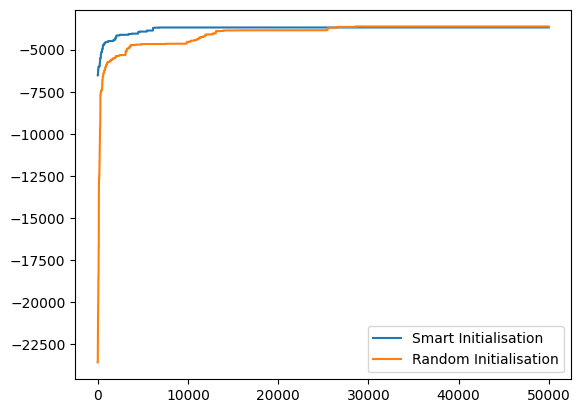

In [254]:
plt.figure()
best_perm, best_log_likelihood, log_likelihood_history = mh_decipher(idx2sym, cipher_idx, stationary_distribution, 
                                                                     normalised_transition_matrix, num_iterations=50000, 
                                                                     print_every=100, initialisation='frequency')
print("\nBest-so-far decryption (first 300 chars):")
print(decrypt_string(idx2sym, best_perm[cipher_idx], show_chars=300))

plt.plot(log_likelihood_history, label='Smart Initialisation')

best_perm, best_log_likelihood, log_likelihood_history = mh_decipher(idx2sym, cipher_idx, stationary_distribution, 
                                                                     normalised_transition_matrix, num_iterations=50000, 
                                                                     print_every=100, initialisation='random')
print("\nBest-so-far decryption (first 300 chars):")
print(decrypt_string(idx2sym, best_perm[cipher_idx], show_chars=300))

plt.plot(log_likelihood_history, label='Random Initialisation')
plt.legend()
plt.show()

In [255]:
print(decrypt_string(idx2sym, best_perm[cipher_idx], show_chars=-1))


in my younger and more vulnerable years my father gave me some advice that i-ve been turning over in my mind ever since! *whenever you feel like criticizing any one,* he told me, *just remember that all the people in this world haven-t had the advantages that you-ve had!* he didn-t say any more but we-ve always been unusually communicative in a reserved way, and i understood that he meant a great deal more than that! in consequence i-m inclined to reserve all judgments, a habit that has opened up many curious natures to me and also made me the victim of not a few veteran bores! the abnormal mind is quick to detect and attach itself to this quality when it appears in a normal person, and so it came about that in college i was unjustly accused of being a politician, because i was privy to the secret griefs of wild, unknown men! most of the confidences were unsought..frequently i have feigned sleep, preoccupation, or a hostile levity when i realized by some unmistakable sign that an intim